# Differentation using numpy functions:

- **Forward differences:** np.diff( )

https://numpy.org/doc/stable/reference/generated/numpy.diff.html


- **Central differences:** np.gradient( ) along a specific axis.

https://numpy.org/doc/stable/reference/generated/numpy.gradient.html

In [2]:
# Import libraries

import numpy as np

import matplotlib.pyplot as plt

In [19]:
# Test vector

a = np.array([0,1,2,3,4,5,6,7,8,9])

b = np.diff(a)

c = np.gradient(a, .1, axis = 0)#the number that we put here is the number of elements divide by this, gives the dx of x for the analysis

print(a, a.shape)

print(b, b.shape)

print(c, c.shape)


#print(len(a))
#print(len(b))
#print(len(c))

[0 1 2 3 4 5 6 7 8 9] (10,)
[1 1 1 1 1 1 1 1 1] (9,)
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.] (10,)


### Example:

Find the derivative of:

$y(x) = \sin(x)$


We know that:

$y'(x) = \cos(x)$

In [20]:
# step size
h = 0.1

# define grid
x = np.arange(-2*np.pi, 2*np.pi, h) 

# compute function
y = np.sin(x) 

In [25]:
# forward differences
forward_diff = np.diff(y)/h 

# central differences
central_diff = np.gradient(y,h,  axis=0)

In [26]:
print(x.shape)
print(y.shape)

print(forward_diff.shape)
print(central_diff.shape)

(126,)
(126,)
(125,)
(126,)


In [27]:
x_fdiff = x[:-1] 

# compute exact solution
exact_solution = np.cos(x_fdiff) 

## Plotting:


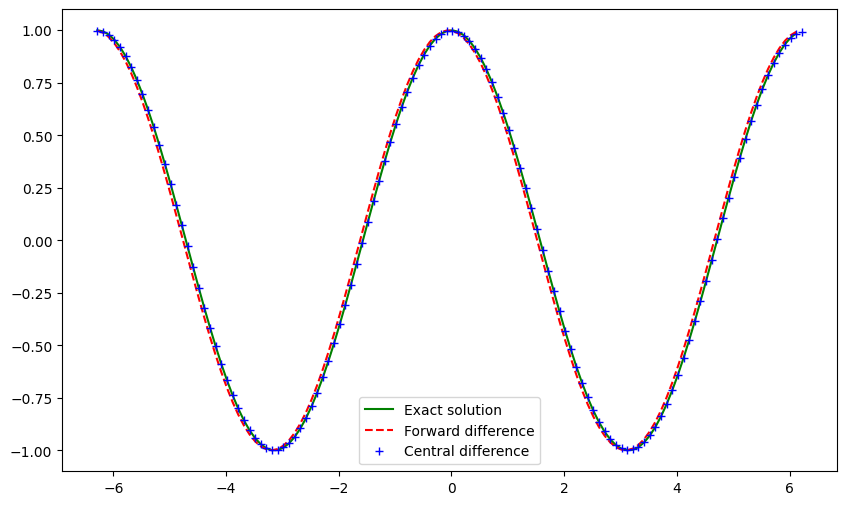

In [28]:
# Figure environment:

plt.figure(figsize = (10, 6))
plt.plot(x_fdiff, exact_solution, c = 'green', linestyle ='-', label = 'Exact solution')
plt.plot(x_fdiff, forward_diff, c = 'red', linestyle ='--', label = 'Forward difference')
plt.plot(x, central_diff, c = 'blue', marker = '+', linestyle =' ' , label = 'Central difference')
plt.legend()
plt.show()

### Error calculation:

In [9]:
# Define error array

eps_fd = np.abs(forward_diff - exact_solution)

eps_fd_max = np.max(eps_fd )

print(eps_fd_max)


# Define rms error array

eps_fd_rms = (forward_diff - exact_solution)**2

eps_fd_rms_av = np.sqrt(np.mean(eps_fd_rms))

print(eps_fd_rms_av)

0.04997545591097786
0.03543885325177162


## Iterative errors:

In [10]:
# define step size
h = 1

# define number of iterations to perform
iterations = 10

# list to store our step sizes
step_size = [] 

# list to store max error for each step size
max_error1 = [] 
max_error2 = [] 

for i in range(iterations):
    # halve the step size
    h /= 2 
    
    # store this step size
    step_size.append(h) 
    
    # compute new grid
    x = np.arange(0, 2 * np.pi, h) 
    
    # compute function value at grid
    y = np.sin(x) 
    
    # compute vector of forward differences
    forward_diff = np.diff(y)/h 
    central_diff = np.gradient(y, h, axis=0) 
    
    # compute corresponding grid
    x_fdiff = x[:-1]
    
    # compute exact solution
    exact_solution = np.cos(x_fdiff) 
    
    # Compute max error between numerical derivative and exact solution
    max_error1.append(np.max(np.abs(exact_solution - forward_diff)))
    max_error2.append(np.max(np.abs(exact_solution - central_diff[:-1])))

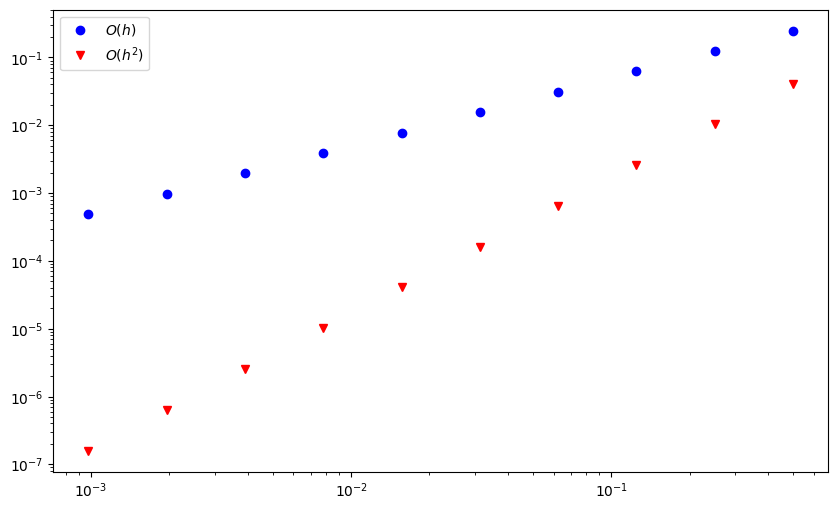

In [11]:
# produce log-log plot of max error versus step size
plt.figure(figsize = (10, 6))
plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.legend()
plt.show()

In [12]:
# Get coefficients

a1, b1 = np.polyfit(np.log10(step_size), np.log10(max_error1), 1)
a2, b2 = np.polyfit(np.log10(step_size), np.log10(max_error2), 1)

# Print to check
print('slope1 =', a1, ' intercept1 =', b1)
print('slope2 =', a2, ' intercept2 =', b2)

# Get fitting function
fit_max_error1 = a1*np.log10(step_size) + b1
fit_max_error2 = a2*np.log10(step_size) + b2

slope1 = 0.9992185747411655  intercept1 = -0.3027943671463207
slope2 = 1.998785302628068  intercept2 = -0.7808863771504406


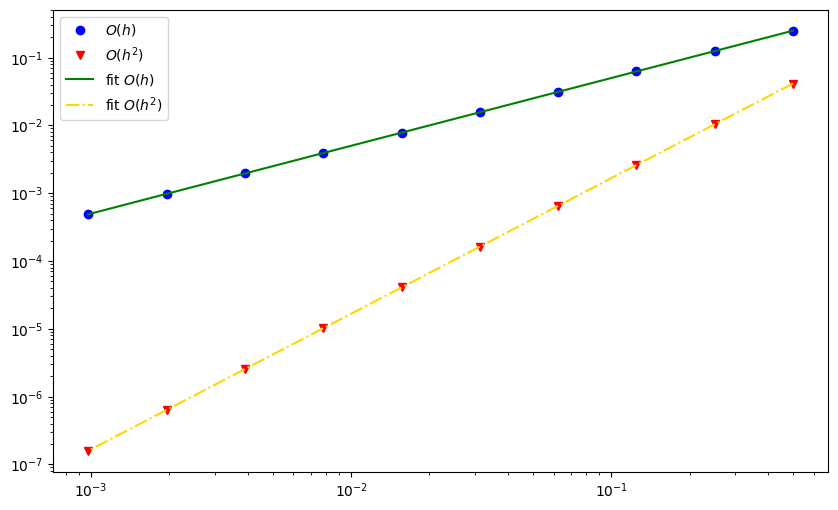

In [13]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (10, 6))

plt.loglog(step_size, max_error1, 'o', c = 'blue', label = r'$O(h)$')
plt.loglog(step_size, max_error2, 'v', c = 'red', label = r'$O(h^2)$')
plt.loglog(step_size, 10**fit_max_error1, linestyle = '-', c = 'green', label = r'fit $O(h)$')
plt.loglog(step_size, 10**fit_max_error2, linestyle = '-.', c = 'gold', label = r'fit $O(h^2)$')

plt.legend()
plt.show()

## Example: derivatives of a time series

In [14]:
import pandas as pd

In [34]:
data_frame1 = pd.read_csv("../Homeworks/temperature-anomaly.csv")

In [35]:
print(data_frame1)

      Entity  Code  Year  Median temperature anomaly from 1961-1990 average  \
0     Global   NaN  1850                                             -0.373   
1     Global   NaN  1851                                             -0.218   
2     Global   NaN  1852                                             -0.228   
3     Global   NaN  1853                                             -0.269   
4     Global   NaN  1854                                             -0.248   
..       ...   ...   ...                                                ...   
675  Tropics   NaN  2015                                              0.737   
676  Tropics   NaN  2016                                              0.763   
677  Tropics   NaN  2017                                              0.563   
678  Tropics   NaN  2018                                              0.473   
679  Tropics   NaN  2019                                              0.656   

     Upper bound (95% CI)  Lower bound (95% CI)  
0

In [36]:
tropics_data = data_frame1.loc[data_frame1["Entity"] == "Tropics"]

In [38]:
print(tropics_data)

      Entity  Code  Year  Median temperature anomaly from 1961-1990 average  \
510  Tropics   NaN  1850                                             -0.308   
511  Tropics   NaN  1851                                             -0.229   
512  Tropics   NaN  1852                                             -0.133   
513  Tropics   NaN  1853                                             -0.141   
514  Tropics   NaN  1854                                             -0.200   
..       ...   ...   ...                                                ...   
675  Tropics   NaN  2015                                              0.737   
676  Tropics   NaN  2016                                              0.763   
677  Tropics   NaN  2017                                              0.563   
678  Tropics   NaN  2018                                              0.473   
679  Tropics   NaN  2019                                              0.656   

     Upper bound (95% CI)  Lower bound (95% CI)  
5

In [39]:
# Place the data into objects:

years = np.array(tropics_data["Year"])

temperature = np.array(tropics_data["Median temperature anomaly from 1961-1990 average"])

In [41]:
print(years)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [42]:
print(years.shape, temperature.shape)

(170,) (170,)


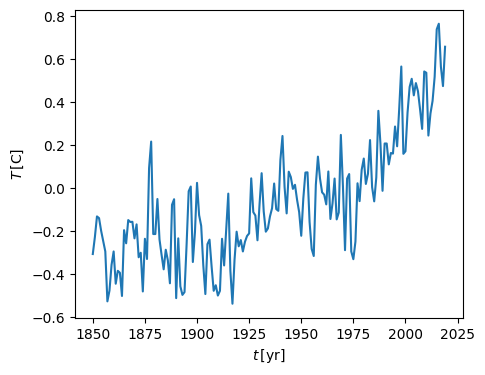

In [43]:
# produce log-log plot of max error versus step size

plt.figure(figsize = (5,4))

plt.plot(years, temperature)

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$T\,\rm [C]$")

#plt.legend()
plt.show()

### Derivative:

In [51]:
# Get delta_x diff into an object

delta_year = years[1] - years[0]

print(delta_year)

1


In [52]:
# Central diff method
central_diff = np.gradient(temperature, delta_year, axis=0)

print(central_diff.shape)

(170,)


The function gradient makes a second order with the two next values for the left side and the two before values for the right side to do a second orden correction

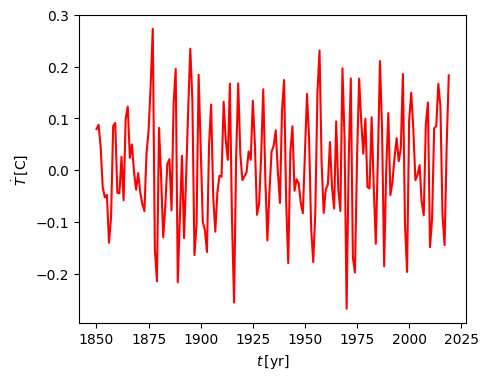

In [53]:
# Derivative plot

plt.figure(figsize = (5, 4))

plt.plot(years, central_diff, color = "red")

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$\dot{T}\,\rm [C]$")

#plt.legend()
plt.show()

### Smooth the data via interpolation:

In [48]:
from scipy import interpolate

In [49]:
#y_spline = interpolate.spline(tropics_data["Year"], tropics_data["Median temperature anomaly from 1961-1990 average"], x_smooth)


tck2 = interpolate.splrep(years, temperature, s=3)

temp_spline = interpolate.splev(years, tck2, der=0)

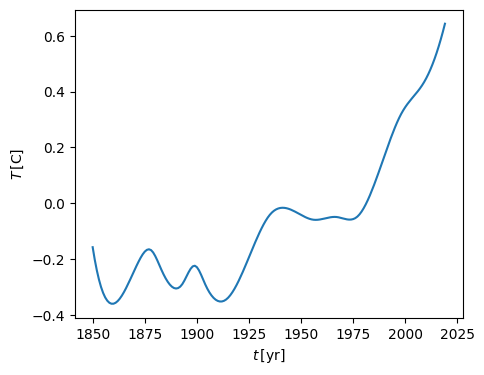

In [50]:
# Interpolation result

plt.figure(figsize = (5, 4))

plt.plot(years, temp_spline)

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$T\,\rm [C]$")
#plt.legend()
plt.show()

### Derivative on the smoothed data:

In [54]:
central_diff2 = np.gradient(temp_spline, delta_year, axis=0)

#print(central_diff.shape)

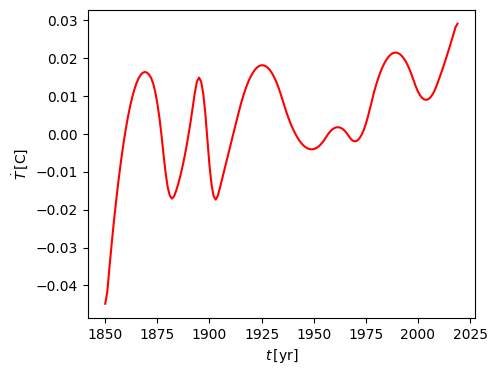

In [55]:
# New derivative plot

plt.figure(figsize = (5, 4))

plt.plot(years, central_diff2, color = "red")

plt.xlabel(r"$t\,\rm [yr]$")
plt.ylabel(r"$\dot{T}\,\rm [C]$")
#plt.legend()
plt.show()